In [42]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
df= pd.read_csv("/content/kidney_disease.csv")

In [44]:
df.head(4)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [45]:
df = df.sample(frac = 1).reset_index(drop=True)

In [46]:
df.shape

(400, 26)

In [47]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [48]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [49]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [50]:
cat_col = []
num_col=[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
    else:
        num_col.append(x)
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [51]:
num_col

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [52]:
def unique_values_cat(data):
    cat_cols=[c for c in data.dtypes.index if data.dtypes[c] =='object']
    cat_unique={c: data[c].unique() for c in cat_cols}
    return cat_unique

In [53]:
unique_values_cat(df)

{'ane': array(['no', 'yes', nan], dtype=object),
 'appet': array(['good', 'poor', nan], dtype=object),
 'ba': array(['notpresent', 'present', nan], dtype=object),
 'cad': array(['no', 'yes', nan, '\tno'], dtype=object),
 'classification': array(['notckd', 'ckd', 'ckd\t'], dtype=object),
 'dm': array(['no', 'yes', nan, '\tno', '\tyes', ' yes'], dtype=object),
 'htn': array(['no', 'yes', nan], dtype=object),
 'pc': array(['normal', 'abnormal', nan], dtype=object),
 'pcc': array(['notpresent', 'present', nan], dtype=object),
 'pcv': array([nan, '26', '40', '28', '42', '30', '22', '43', '46', '44', '35',
        '48', '27', '29', '41', '49', '32', '54', '36', '50', '34', '24',
        '52', '25', '31', '51', '20', '45', '9', '53', '38', '37', '15',
        '33', '39', '19', '17', '16', '21', '47', '18', '23', '\t43',
        '\t?', '14'], dtype=object),
 'pe': array(['no', 'yes', nan], dtype=object),
 'rbc': array(['normal', 'abnormal', nan], dtype=object),
 'rc': array([nan, '3.1', '4.7',

In [54]:
df=df.replace('\t',"",regex=True)

In [55]:
df=df.replace('?',np.nan)

In [56]:
unique_values_cat(df)

{'ane': array(['no', 'yes', nan], dtype=object),
 'appet': array(['good', 'poor', nan], dtype=object),
 'ba': array(['notpresent', 'present', nan], dtype=object),
 'cad': array(['no', 'yes', nan], dtype=object),
 'classification': array(['notckd', 'ckd'], dtype=object),
 'dm': array(['no', 'yes', nan, ' yes'], dtype=object),
 'htn': array(['no', 'yes', nan], dtype=object),
 'pc': array(['normal', 'abnormal', nan], dtype=object),
 'pcc': array(['notpresent', 'present', nan], dtype=object),
 'pcv': array([nan, '26', '40', '28', '42', '30', '22', '43', '46', '44', '35',
        '48', '27', '29', '41', '49', '32', '54', '36', '50', '34', '24',
        '52', '25', '31', '51', '20', '45', '9', '53', '38', '37', '15',
        '33', '39', '19', '17', '16', '21', '47', '18', '23', '14'],
       dtype=object),
 'pe': array(['no', 'yes', nan], dtype=object),
 'rbc': array(['normal', 'abnormal', nan], dtype=object),
 'rc': array([nan, '3.1', '4.7', '3.2', '6.4', '4.2', '4.8', '2.1', '5.4', '5.3',


In [57]:
df[['pcv','wc','rc']].isna().any(axis=1).sum()

136

In [58]:
df.wc.isna().sum()

106

lors du conversion des colonne de type object to numerics (celles qu'elles doivent etre numeriques) on a un prob : un erreur raised à cause des 'NAN'.
jai pensé d'effacer les NAN pour ces 3 colonnes, mais on ne peux pas car le nombre est important, donc on essai de faire une autre logique.

In [59]:
def convert_cat_to_num(cols,data):

    for c in cols:
        
        data[c]=data[c].apply(lambda x: float(x) if x != np.nan else x)
       
       

In [60]:
convert_cat_to_num(['pcv','wc','rc'] ,df)

In [61]:
cat_col = []
num_col=[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
    else:
        num_col.append(x)
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [62]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [63]:
def impute_missing_values_num(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mean())

In [64]:
impute_missing_values_num(df, num_col)

In [65]:
unique_values_cat(df)

{'ane': array(['no', 'yes', nan], dtype=object),
 'appet': array(['good', 'poor', nan], dtype=object),
 'ba': array(['notpresent', 'present', nan], dtype=object),
 'cad': array(['no', 'yes', nan], dtype=object),
 'classification': array(['notckd', 'ckd'], dtype=object),
 'dm': array(['no', 'yes', nan, ' yes'], dtype=object),
 'htn': array(['no', 'yes', nan], dtype=object),
 'pc': array(['normal', 'abnormal', nan], dtype=object),
 'pcc': array(['notpresent', 'present', nan], dtype=object),
 'pe': array(['no', 'yes', nan], dtype=object),
 'rbc': array(['normal', 'abnormal', nan], dtype=object)}

In [66]:
df['dm']=df['dm'].apply(lambda x: 'yes' if (x == ' yes') else x)

In [67]:
df['dm'].unique()

array(['no', 'yes', nan], dtype=object)

In [68]:
def impute_missing_values_cat(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mode()[0])

impute_missing_values_cat(df, cat_col)

In [69]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [70]:
y=df["classification"]
x=df.drop("classification",axis=1)

In [71]:
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,324,40.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,...,12.526437,38.884498,8406.122449,4.707435,no,no,no,good,no,no
1,171,83.0,70.0,1.020000,3.000000,0.000000,normal,normal,notpresent,notpresent,...,8.700000,26.000000,12800.000000,3.100000,yes,no,no,poor,no,yes
2,351,29.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,...,17.500000,40.000000,9900.000000,4.700000,no,no,no,good,no,no
3,71,46.0,60.0,1.010000,1.000000,0.000000,normal,normal,notpresent,notpresent,...,9.800000,28.000000,14600.000000,3.200000,yes,yes,no,good,no,no
4,143,41.0,80.0,1.015000,1.000000,4.000000,abnormal,normal,notpresent,notpresent,...,12.526437,38.884498,8406.122449,4.707435,no,yes,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11,63.0,70.0,1.010000,3.000000,0.000000,abnormal,abnormal,present,notpresent,...,10.800000,32.000000,4500.000000,3.800000,yes,yes,no,poor,yes,no
396,19,62.0,60.0,1.015000,1.000000,0.000000,normal,abnormal,present,notpresent,...,10.300000,30.000000,5300.000000,3.700000,yes,no,yes,good,no,no
397,151,76.0,90.0,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,...,9.600000,30.000000,8406.122449,4.707435,yes,yes,no,good,no,yes
398,346,33.0,60.0,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,...,15.500000,52.000000,4300.000000,5.800000,no,no,no,good,no,no


###### 

In [72]:
y

0      notckd
1         ckd
2      notckd
3         ckd
4         ckd
        ...  
395       ckd
396       ckd
397       ckd
398    notckd
399       ckd
Name: classification, Length: 400, dtype: object

In [73]:
y=np.array([0 if value == 'notckd' else 1 for value in y])
y

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [74]:
sum(y)/len(y)

0.625

In [75]:
unique_values_cat(x)

{'ane': array(['no', 'yes'], dtype=object),
 'appet': array(['good', 'poor'], dtype=object),
 'ba': array(['notpresent', 'present'], dtype=object),
 'cad': array(['no', 'yes'], dtype=object),
 'dm': array(['no', 'yes'], dtype=object),
 'htn': array(['no', 'yes'], dtype=object),
 'pc': array(['normal', 'abnormal'], dtype=object),
 'pcc': array(['notpresent', 'present'], dtype=object),
 'pe': array(['no', 'yes'], dtype=object),
 'rbc': array(['normal', 'abnormal'], dtype=object)}

# oneHot encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cols = [c for c in x.columns if x.dtypes[c]=='object']
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), cols)], remainder='passthrough')
data = columnTransformer.fit_transform(x)
column_name = columnTransformer.get_feature_names()
data =  pd.DataFrame(data, columns= column_name)
data.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,encoder__x0_normal,encoder__x1_normal,encoder__x2_present,encoder__x3_present,encoder__x4_yes,encoder__x5_yes,encoder__x6_yes,encoder__x7_poor,encoder__x8_yes,encoder__x9_yes,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,119.0,15.0,0.7,150.0,4.9,12.526437,38.884498,8406.122449,4.707435
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,102.0,60.0,2.6,115.0,5.7,8.700000,26.000000,12800.000000,3.100000


# scaling the data

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [78]:
x

,encoder__x0_normal,encoder__x1_normal,encoder__x2_present,encoder__x3_present,encoder__x4_yes,encoder__x5_yes,encoder__x6_yes,encoder__x7_poor,encoder__x8_yes,encoder__x9_yes,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.364890,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,...,-4.377969e-01,-0.388765,-0.861887,-0.422862,1.356638e+00,9.685073e-02,-1.309624e-15,-6.109653e-15,4.330817e-15,-1.375768e-14
1,0.364890,0.484322,-0.342518,-0.241249,1.311903,-0.721743,-0.304789,1.969276,-0.484322,2.380476,...,-4.377969e-01,-0.616375,0.052297,-0.084209,-2.450706e+00,3.809158e-01,-1.410526e+00,-1.582690e+00,1.743558e+00,-1.915293e+00
2,0.364890,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,...,-4.377969e-01,-0.870763,-0.171170,-0.387215,1.600440e-01,-4.712795e-01,1.833387e+00,1.370246e-01,5.927935e-01,-8.858894e-03
3,0.364890,0.484322,-0.342518,-0.241249,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,...,-4.377969e-01,0.200344,0.702383,0.040557,3.776065e-01,-2.227225e-01,-1.005037e+00,-1.337016e+00,2.457826e+00,-1.796141e+00
4,-2.740554,0.484322,-0.342518,-0.241249,-0.762252,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,...,3.452500e+00,0.829619,2.185392,2.660662,-2.750810e-01,2.583445e-02,-1.309624e-15,-6.109653e-15,4.330817e-15,-1.375768e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2.740554,-2.064742,2.919556,-0.241249,1.311903,1.385535,-0.304789,1.969276,2.064742,-0.420084,...,-4.377969e-01,3.105721,0.052297,-0.066386,-7.102060e-01,-1.517063e-01,-6.364101e-01,-8.456694e-01,-1.550009e+00,-1.081228e+00
396,0.364890,-2.064742,2.919556,-0.241249,1.311903,-0.721743,3.280961,-0.507801,-0.484322,-0.420084,...,-4.377969e-01,-0.643153,-0.536844,-0.262448,-9.275247e-15,1.261503e-15,-8.207233e-01,-1.091343e+00,-1.232557e+00,-1.200380e+00
397,0.364890,0.484322,-0.342518,-0.241249,1.311903,1.385535,-0.304789,-0.507801,-0.484322,2.380476,...,6.478645e-16,0.320843,-0.232116,-0.244624,3.776065e-01,3.098996e-01,-1.078762e+00,-1.091343e+00,4.330817e-15,-1.375768e-14
398,0.364890,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,...,6.478645e-16,-0.241488,-0.333692,-0.387215,3.776065e-01,-8.068997e-02,1.096134e+00,1.611066e+00,-1.629372e+00,1.301814e+00


# Train-Test Split

In [79]:
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state =41,stratify=y)

# train the models

In [80]:
modelKNN = KNeighborsClassifier()

modelKNN.fit(x_train,y_train)
y_pred =model.predict(x_test)


In [81]:
model.score(x_test, y_test)

0.97

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  0],
       [ 3, 59]])

 # Model selection using grid search

In [83]:
model_params = {
    'KNN' : { 'model': KNeighborsClassifier(),
             'params':{ 'n_neighbors' : [3,5],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean']
    }
        
    
    },
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
        
           'n_estimators': [ 100,150,250],
           'max_features': ['sqrt', 0.25, 0.5]
        }     
       
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [ 1e-2, 1e-1],
            'solver': [ 'lbfgs', 'liblinear'],
            'penalty':[ 'l2', 'elasticnet']
        }
    }
}

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
scores = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False,scoring='roc_auc')
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

,model,best_score,best_params
0,KNN,0.998,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."
1,random_forest,1.000,"{'max_features': 'sqrt', 'n_estimators': 100}"
2,logistic_regression,1.000,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}"


# random forst classiffier

In [85]:
rf = RandomForestClassifier(max_features= 'sqrt', n_estimators= 100)

In [86]:

rf.fit(x_train, y_train)
y_pred =rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  0],
       [ 0, 62]])

Text(0.5, 15.0, 'Predicted label')

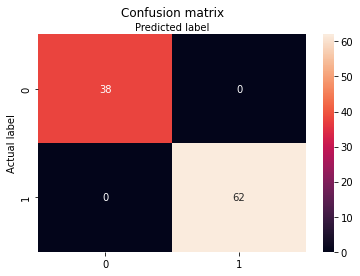

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cm, annot=True)
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        62

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



resultat extraordinaire 0 faute. algorithme trés puissant.

# logisitic regression

In [91]:
m = LogisticRegression(C= 0.01, penalty='l2', solver= 'lbfgs')

In [92]:
m.fit(x_train, y_train)
y_pred =m.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[38,  0],
       [ 1, 61]])

# KNN

In [96]:
df.loc[0,'best_params']

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [98]:
modelKNN = KNeighborsClassifier(metric= 'minkowski',n_neighbors= 5, weights='distance')

modelKNN.fit(x_train,y_train)
y_pred =model.predict(x_test)

In [99]:
model.score(x_test, y_test)

0.97

In [100]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  0],
       [ 3, 59]])

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.95      0.98        62

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



on a obtenu les meme resulta de celui du model knn avant le hyperparapeter tuning avec gridsearch.

conclusion : le model qui a meilleures resultats est RandomForest classifier

classemeent par resultat:

1/randomforest classifier

2/logisitc regression

3/knn